# An example of Differential Evolution algorithm implementation in Python 3
As described in https://en.wikipedia.org/wiki/Differential_evolution

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import random

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## 1-D example

[[1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]
 [1.99998764]]
37


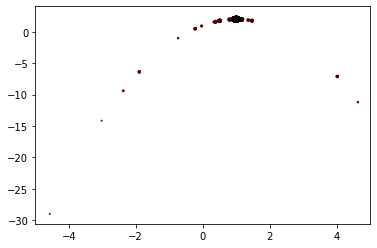

In [167]:
# Function to maximize
def f(x):
    return -(x-1)**2+2
#Parameters
xmin = -5
xmax = 5
eps = 0.01
n = 10
dim = 1
CR = 0.5 # crossover probability
F = 1 # between 0 and 2

# Initialization
x = np.random.rand(n,dim)*(xmax-xmin)+xmin
xnew = np.zeros((n,dim))

# Main loop
tol = 1e9
count = 0
while tol > eps:
    plt.xlim(xmin,xmax)
    color = [(1-sigmoid(count/10),0,0) for i in range(n)]
    plt.scatter(x,f(x),s=(count+1),c=color,cmap=plt.get_cmap("Reds"))
    for idx,curr_x in enumerate(x):
        L = list(range(n))
        L.pop(idx)
        seeds = []
        for j in range(3):
            chosen = random.choice(L)
            seeds.append(chosen)
            L.remove(chosen)
        a, b, c = x[seeds]
        delta = np.random.rand(dim)
        for i in range(dim):
            if (i == delta) or ( random.random()<= CR):
                xnew[idx,i] = a + F*(b-c)
            else:
                xnew[idx,i] = curr_x
    f_x = f(x)
    f_new = f(xnew)
    x[f_new>f_x] = xnew[f_new>f_x]
    tol = np.max(np.max(xnew)-np.min(xnew)) #np.linalg.norm(f_x-f_new)
    count += 1
    
print(f_x)
print(count)

## 2-D example and function

In [168]:
# DE function for multidimensioal objective function

def de_optimize(f,**kwargs):
    
    # Get parameters
    xmin = kwargs['xmin']
    xmax = kwargs['xmax']
    eps = kwargs['eps']
    n = kwargs['pop_size']
    dim = kwargs['n_dim']
    CR = kwargs['crossover']
    F = kwargs['diff_weight']
    maximize = kwargs['maximize']
    
    # Initialization
    x = np.random.rand(n,dim)*(xmax-xmin)+xmin
    xnew = np.zeros((n,dim))

    # Main loop
    tol = 1e9
    count = 0
    while tol > eps:
        for idx,curr_x in enumerate(x):
            L = list(range(n))
            L.pop(idx)
            seeds = []
            for j in range(3):
                chosen = random.choice(L)
                seeds.append(chosen)
                L.remove(chosen)
            a, b, c = x[seeds]
            delta = np.random.randint(dim)
            for i in range(dim):
                if (i == delta) or ( random.random()<= CR):
                    xnew[idx,i] = a[i] + F*(b[i]-c[i])
                else:
                    xnew[idx,i] = curr_x[i]
        f_x = f(x)
        f_new = f(xnew)
        if maximize:
            x[f_new>f_x] = xnew[f_new>f_x]
        else:
            x[f_new<f_x] = xnew[f_new<f_x]
        tol = np.max(np.max(xnew)-np.min(xnew)) #np.linalg.norm(f_x-f_new) # the stop criterion might not be the best
        count += 1
    if maximize:
        solution = x[np.argmax(f_x)]
        optimum = np.max(f_x)
    else:
        solution = x[np.argmin(f_x)]
        optimum = np.min(f_x)
    return solution,optimum,count
        


In [169]:
# Application
rec = {'xmin' : -5, 'xmax' : 5,
      'eps' : 0.001,
      'pop_size' : 10, 'n_dim' : 2,
      'crossover' : 0.5, 'diff_weight' : 1.0,
      'maximize' : False}

def f_2d(x):
    return x[:,0]**2+x[:,1]**2-1

de_optimize(f_2d,**rec)

(array([-3.16667698e-05, -4.06454393e-04]), -0.9999998337920419, 66)

In [174]:
# Application
rec = {'xmin' : np.array([-5,-3,-4]), 'xmax' : np.array([5,6,2]),
      'eps' : 0.001,
      'pop_size' : 10, 'n_dim' : 3,
      'crossover' : 0.5, 'diff_weight' : 1.0,
      'maximize' : False}

def f_3d(x):
    return x[:,0]**2+x[:,1]**2+x[:,2]**4-1

de_optimize(f_3d,**rec)

(array([ 2.40150485e-07, -8.08221138e-04, -1.77840397e-05]),
 -0.9999993467785341,
 119)

# Modified DE
Adapted from:
https://aip.scitation.org/doi/pdf/10.1063/1.5013964
Converges more slowly but hits global optimum more often.

In [200]:
# Modified DE function for multidimensioal objective function

def modified_de_optimize(f,**kwargs):
    
    # Get parameters
    xmin = kwargs['xmin']
    xmax = kwargs['xmax']
    eps = kwargs['eps']
    n = kwargs['pop_size']
    dim = kwargs['n_dim']
    CR = kwargs['crossover']
    F = kwargs['diff_weight']
    maximize = kwargs['maximize']
    R = kwargs['R']
    n_bad = int(R * n)
    
    # Initialization
    x = np.random.rand(n,dim)*(xmax-xmin)+xmin
    xnew = np.zeros((n,dim))

    # Main loop
    tol = 1e9
    count = 0
    while tol > eps:
        for idx,curr_x in enumerate(x):
            L = list(range(n))
            L.pop(idx)
            seeds = []
            for j in range(3):
                chosen = random.choice(L)
                seeds.append(chosen)
                L.remove(chosen)
            a, b, c = x[seeds]
            delta = np.random.randint(dim)
            for i in range(dim):
                if (i == delta) or ( random.random()<= CR):
                    xnew[idx,i] = a[i] + F*(b[i]-c[i])
                else:
                    xnew[idx,i] = curr_x[i]
        f_x = f(x)
        f_new = f(xnew)
        if maximize:
            x[f_new>f_x] = xnew[f_new>f_x]
            f_x[f_new>f_x] = f_new[f_new>f_x]
        else:
            x[f_new<f_x] = xnew[f_new<f_x]
            f_x[f_new<f_x] = f_new[f_new<f_x]
            
        tol = np.max(np.max(xnew)-np.min(xnew)) #np.linalg.norm(f_x-f_new) # the stop criterion might not be the best
        count += 1
        if (n_bad > 0):
            B = np.hstack((x,f_x.reshape((n,1))))
            B = B[B[:,-1].argsort()] # Sorting by increasing size of f_x, biggest values at the bottom
            x = B[:,:dim]
            if maximize:
                x[:n_bad,:] =  np.random.rand(n_bad,dim)*(xmax-xmin)+xmin #reinitiliaze x giving the smallest values
            else:
                x[n-n_bad:,:] =  np.random.rand(n_bad,dim)*(xmax-xmin)+xmin #reinitiliaze x giving the highest values
    if maximize:
        solution = x[np.argmax(f_x)]
        optimum = np.max(f_x)
    else:
        solution = x[np.argmin(f_x)]
        optimum = np.min(f_x)
    return solution,optimum,count

In [201]:
# Application
rec = {'xmin' : -5, 'xmax' : 5,
      'eps' : 0.001,
      'pop_size' : 10, 'n_dim' : 2,
      'crossover' : 0.5, 'diff_weight' : 1.0,
      'maximize' : False, 'R' : 0.1}

def f_2d(x):
    return x[:,0]**2+x[:,1]**2-1

print(de_optimize(f_2d,**rec))

modified_de_optimize(f_2d,**rec)

(array([-2.20696251e-04,  4.48496664e-05]), -0.9999999492816724, 66)


(array([ 2.16920716e-06, -1.23667156e-05]), -0.9999999998423589, 145)